# Проект 2: разведывательный анализ данных

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

Названия колонок (в исходном датасете).

1. school — аббревиатура школы, в которой учится ученик

1. sex — пол ученика ('F' - женский, 'M' - мужской)

1. age — возраст ученика (от 15 до 22)

1. address — тип адреса ученика ('U' - городской, 'R' - за городом)

1. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

1. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

1. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

1. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

1. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

1. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

1. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

1. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

1. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

1. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

1. schoolsup — дополнительная образовательная поддержка (yes или no)

1. famsup — семейная образовательная поддержка (yes или no)

1. paid — дополнительные платные занятия по математике (yes или no)

1. activities — дополнительные внеучебные занятия (yes или no)

1. nursery — посещал детский сад (yes или no)

1. higher — хочет получить высшее образование (yes или no)

1. internet — наличие интернета дома (yes или no)

1. romantic — в романтических отношениях (yes или no)

1. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

1. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

1. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

1. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

1. absences — количество пропущенных занятий

1. score — баллы по госэкзамену по математике

In [2]:
# Названия колонок в исходном датасете:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [3]:
# Переименовываю имена колонок в форму которую мне удобней помнить.
students.rename(
    columns={
        'famsize': 'family_size',
        'Fedu': 'father_education',
        'Fjob': 'father_job',
        'Medu': 'mother_education',
        'Mjob': 'mother_job',
        'studytime, granular': 'granular_study_time',
        'studytime': 'study_time',
        'freetime': 'free_time',
        'traveltime': 'travel_time',
        'goout': 'go_out',
        'famrel': 'family_relations',
        'schoolsup': 'school_support',
        'famsup': 'family_support',
        'Pstatus': 'parents_status',
    },
    inplace=True
)

Названия колонок (более удобные мне).

1. school — аббревиатура школы, в которой учится ученик

1. sex — пол ученика ('F' - женский, 'M' - мужской)

1. age — возраст ученика (от 15 до 22)

1. address — тип адреса ученика ('U' - городской, 'R' - за городом)

1. family_size — размер семьи('LE3' <= 3, 'GT3' >3)

1. parents_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

1. mother_education — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

1. father_education — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

1. mother_job — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

1. father_job — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

1. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

1. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

1. travel_time — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1. study_time — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

1. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

1. schoolsup — дополнительная образовательная поддержка (yes или no)

1. family_support — семейная образовательная поддержка (yes или no)

1. paid — дополнительные платные занятия по математике (yes или no)

1. activities — дополнительные внеучебные занятия (yes или no)

1. nursery — посещал детский сад (yes или no)

1. higher — хочет получить высшее образование (yes или no)

1. internet — наличие интернета дома (yes или no)

1. romantic — в романтических отношениях (yes или no)

1. family_relations — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

1. free_time — свободное время после школы (от 1 - очень мало до 5 - очень мого)

1. go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

1. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

1. absences — количество пропущенных занятий

1. score — баллы по госэкзамену по математике

In [4]:
# Взгляд сверху на данные.
display(students.shape)

# Нам заведомо не нужны колонки в которых нет информации
# про оценки по математике
students = students.dropna(subset=['score'])

# Взгляд сверху на данные после того как мы дропнули несколько колонок.
display(students.shape)
display(students.head(5))
display(students.describe(include='object'))
display(students.describe())

(395, 30)

(389, 30)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,granular_study_time,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


,school,sex,address,family_size,parents_status,mother_job,father_job,reason,guardian,school_support,family_support,paid,activities,nursery,higher,internet,romantic
count,389,389,374,362,344,370,353,372,358,380,351,350,375,374,369,355,358
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,344,204,291,255,308,127,194,135,248,331,216,197,192,297,350,300,235


,age,mother_education,father_education,travel_time,study_time,failures,granular_study_time,family_relations,free_time,go_out,health,absences,score
count,389.000000,386.000000,365.000000,361.000000,382.000000,367.000000,382.000000,362.000000,380.000000,382.000000,374.000000,378.000000,389.000000
mean,16.673522,2.766839,2.627397,1.434903,2.036649,0.326975,-6.109948,3.930939,3.223684,3.094241,3.529412,7.320106,52.262211
std,1.265662,1.094277,2.241790,0.692660,0.847239,0.729479,2.541716,0.931554,0.993364,1.116104,1.402006,23.615525,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [5]:
# Анализ типов и пустых значений.
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   family_size          362 non-null    object 
 5   parents_status       344 non-null    object 
 6   mother_education     386 non-null    float64
 7   father_education     365 non-null    float64
 8   mother_job           370 non-null    object 
 9   father_job           353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  travel_time          361 non-null    float64
 13  study_time           382 non-null    float64
 14  failures             367 non-null    float64
 15  school_support       380 non-null    obj

А если мы сбросим все пустые значения - насколько у нас обеднеют данные?

In [6]:
print(students.shape)
print(students.dropna().shape)

(389, 30)
(97, 30)


...слишком много потеряем информации. Придётся разбираться с каждым рядом.

Эту функцию буду использовать чтобы быстро оценить что происходит в колонке:

In [7]:
def report_uniqueness_in_serie(serie):
    """Быстрый отчёт по уникальным значениям колонки."""
    
    print(f'{"__"*30}')
    
    print(
        pd.DataFrame(serie.value_counts())
    )
    amount_of_nan_elements = sum(serie.isna())
    
    if amount_of_nan_elements > 0:
        print(f'nan: {amount_of_nan_elements}')
    else:
        print(':) nice - no nans')

## Колонка score

In [8]:
report_uniqueness_in_serie(students.score)

____________________________________________________________
       score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
70.0      27
45.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
85.0       6
95.0       5
100.0      1
20.0       1
:) nice - no nans


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

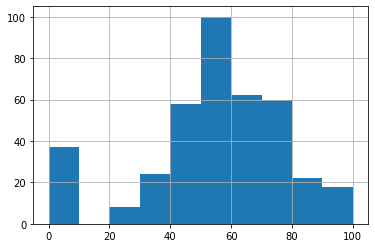

In [9]:
students.score.hist()
students.score.describe()

0 хотя и похож на выброс - либо очень важная для нас информация. Надо посмотреть - может данные коррумпированы:

In [10]:
students[students.score == 0]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,granular_study_time,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Нет, данные не коррумпированы... Значит просто поудалять эти строки мы не сможем.

Мне в глаза бросается что в этом срезе -
1. Много ребят из школы GP
1. У многих - плохое здоровье.
1. Удивительно что поля absences - все по нулям. Я бы ожидал нули от более заядлых прогульщиков. И ведь они же учатся - study_time не на нуле.

In [11]:
# Просто идея... нет, посмотрел результат выполнения - не получится.
print(students[students.score == 0].shape)
print(students[students.score == 0].dropna().shape)

(37, 30)
(7, 30)


## Колонка school

In [12]:
report_uniqueness_in_serie(students.school)

____________________________________________________________
    school
GP     344
MS      45
:) nice - no nans


С этой колонкой проблем нет, но она так же объясняет почему так много нулевиков в GP - в нашу выборку попала 344 ученика из неё проти 45 учеников из MS. А так в целом - достаточно причёсанная и безобидная колонка...

## Колонка health

____________________________________________________________
     health
5.0     137
3.0      88
4.0      60
1.0      47
2.0      42
nan: 15


count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

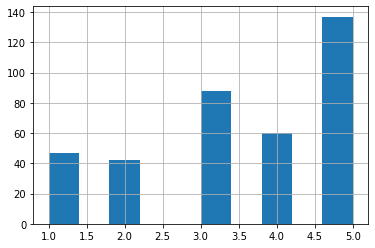

In [13]:
report_uniqueness_in_serie(students.health)
students.health.hist()
students.health.describe()

In [14]:
students[students.health.isna()]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,granular_study_time,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,NaN,other,other,home,father,1.0,2.0,NaN,no,no,NaN,yes,no,-6.0,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0


Насколько я вижу - если выкинем строки с NaN health - никакой серьёзной информации по успеваемости не потеряем - достаточно равномерно размазанно по середнячкам.

In [15]:
print(students.shape)
students = students.dropna(subset=['health'])
print(students.shape)

(389, 30)
(374, 30)


## Колонки mother_education, father_education

In [16]:
report_uniqueness_in_serie(students['mother_education'])
report_uniqueness_in_serie(students['father_education'])

____________________________________________________________
     mother_education
4.0               129
2.0                94
3.0                93
1.0                52
0.0                 3
nan: 3
____________________________________________________________
      father_education
2.0                100
3.0                 94
4.0                 86
1.0                 69
0.0                  2
40.0                 1
nan: 22


In [17]:
students[students['mother_education'].isna()]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,granular_study_time,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


Всего три рядя - можно удалить.

In [18]:
print(students.shape)
students = students.dropna(subset=['mother_education'])
print(students.shape)

(374, 30)
(371, 30)


In [19]:
students[students['father_education'].isna()]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,granular_study_time,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


<AxesSubplot:>

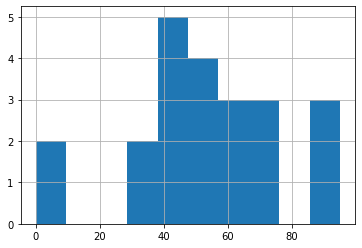

In [20]:
students[students['father_education'].isna()].score.hist()

Выглядит достаточно равномерко размазано. Думаю что можно удалить без проблем.

In [21]:
print(students.shape)
students = students.dropna(subset=['father_education'])
print(students.shape)

(371, 30)
(349, 30)


У колонок **mother_education**, **father_education**, тип - float - но это некорректно. На самом деле эти числа - просто индексы

In [22]:
students['mother_education'] = students['mother_education'].astype(str)
students['father_education'] = students['father_education'].astype(str)

## Колонки travel_time, study_time

In [23]:
report_uniqueness_in_serie(students['travel_time'])
report_uniqueness_in_serie(students['study_time'])

____________________________________________________________
     travel_time
1.0          211
2.0           87
3.0           21
4.0            6
nan: 24
____________________________________________________________
     study_time
2.0         167
1.0          95
3.0          58
4.0          23
nan: 6


У колонок **travel_time**, **study_time**, тип - float - но это некорректно. На самом деле эти числа - просто индексы

In [24]:
students['travel_time'] = students['travel_time'].fillna('unknown')
students['study_time']  = students['study_time'].fillna('unknown')

students['travel_time'] = students['travel_time'].astype(str)
students['study_time']  = students['study_time'].astype(str)

## Общий взгляд на колонки со строками

In [25]:
for column_name in students.columns:
    if students.dtypes[column_name] == 'object':
        report_uniqueness_in_serie(
            students[column_name]
        )

____________________________________________________________
    school
GP     306
MS      43
:) nice - no nans
____________________________________________________________
   sex
F  187
M  162
:) nice - no nans
____________________________________________________________
   address
U      260
R       76
nan: 13
____________________________________________________________
     family_size
GT3          229
LE3           95
nan: 25
____________________________________________________________
   parents_status
T             279
A              31
nan: 39
____________________________________________________________
     mother_education
4.0               119
2.0                92
3.0                86
1.0                49
0.0                 3
:) nice - no nans
____________________________________________________________
      father_education
2.0                 99
3.0                 93
4.0                 86
1.0                 68
0.0                  2
40.0                 1
:) nice - 

Выглядит прилично но имеет смысл заменить nan на строки, назовём их "unknown".
Будут затронуты колонки address, family_size, parents_status, mother_job, father_job, reason, guardian, school_support, family_support, paid, activities, nursery, higher, internet, romantic, travel_time, study_time.

In [26]:
# Дальше удалять
column_names = [
    'address',
    'family_size',
    'parents_status',
    'mother_job',
    'father_job',
    'reason',
    'guardian',
    'school_support',
    'family_support',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
]
for column_name in column_names:
    students[column_name] = students[column_name].fillna('unknown')

for column_name in students.columns:
    if students.dtypes[column_name] == 'object':
        report_uniqueness_in_serie(
            students[column_name]
        )

____________________________________________________________
    school
GP     306
MS      43
:) nice - no nans
____________________________________________________________
   sex
F  187
M  162
:) nice - no nans
____________________________________________________________
         address
U            260
R             76
unknown       13
:) nice - no nans
____________________________________________________________
         family_size
GT3              229
LE3               95
unknown           25
:) nice - no nans
____________________________________________________________
         parents_status
T                   279
unknown              39
A                    31
:) nice - no nans
____________________________________________________________
     mother_education
4.0               119
2.0                92
3.0                86
1.0                49
0.0                 3
:) nice - no nans
____________________________________________________________
      father_education
2.0     

## Общий взгляд на колонки со числами

In [27]:
for column_name in students.columns:
    if students.dtypes[column_name] == 'int':
        report_uniqueness_in_serie(
            students[column_name]
        )

____________________________________________________________
    age
16   93
17   85
15   74
18   73
19   19
20    3
22    1
21    1
:) nice - no nans


In [28]:
for column_name in students.columns:
    if students.dtypes[column_name] == 'float':
        report_uniqueness_in_serie(
            students[column_name]
        )

____________________________________________________________
     failures
0.0       263
1.0        42
2.0        13
3.0        13
nan: 18
____________________________________________________________
       granular_study_time
-6.0                   167
-3.0                    95
-9.0                    58
-12.0                   23
nan: 6
____________________________________________________________
      family_relations
 4.0               155
 5.0                89
 3.0                57
 2.0                16
 1.0                 7
-1.0                 1
nan: 24
____________________________________________________________
     free_time
3.0        138
4.0         98
2.0         58
5.0         31
1.0         17
nan: 7
____________________________________________________________
     go_out
3.0     118
2.0      88
4.0      71
5.0      44
1.0      22
nan: 6
____________________________________________________________
     health
5.0     124
3.0      82
4.0      59
1.0      46
2.0      

Всё ок, но NaN - в колонках travel_time, study_time, failures, granular_study_time, family_relations, free_time, go_out, absences.

In [29]:
column_names = [
    'travel_time',
    'study_time',
    'failures',
    'granular_study_time',
    'family_relations',
    'free_time',
    'go_out',
    'absences',
]